In [1]:
import numpy as np, plottools as pl, local, tools_cmb, quad_func, binning as bn, analysis as ana
from matplotlib.pyplot import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
def plot_spec(qobj,rlz=None,cn=2,bnum=10,lmin=40,lmax=2048,real=True):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Mkk, Vkk, Skk, Okk = local.load_spec(qobj,mb,rlz=rlz,cn=cn)
    st0 = ana.PTEs(Okk,Skk,x1pte=True)
    st1 = ana.PTEs(Okk,Skk,x1pte=True,diag=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab='$10^2L^{0.5}C_L^{\kappa\kappa}$')
    if cn==1:
        errorbar(mb.bc-5,(Okk),yerr=Vkk,fmt='o')
        errorbar(mb.bc-5,(Mkk),yerr=Vkk,fmt='o')
    elif cn==2:
        errorbar(mb.bc-5,(Okk-Mkk),yerr=Vkk,fmt='o')
    plot(aobj.l,aobj.ckk,color='k',ls='--')
    figtext(.7,.80,r'$\chi$-PTE:'+str(np.round(st0.px1,2)))
    figtext(.7,.75,r'$\chi^2$-PTE:'+str(np.round(st0.px2,2)))
    figtext(.7,.70,r'$\chi^2$-PTE (diag):'+str(np.round(st1.px2,2)))
    axhline(0,color='k')
    show()

In [3]:
def snr(qobj,rlz=None,cn=1,lmin=40,lmax=2048,bnum=10):
    mb = bn.multipole_binning(bnum,lmin=lmin,lmax=lmax)
    Mkk, Vkk, Skk, __, nb = local.load_spec(qobj,mb,rlz=rlz,cn=cn,outN0=True)
    print(np.sqrt(np.sum(Mkk**2/Vkk**2)))
    st = ana.amplitude(Mkk,Skk,fcb=None,diag=False,disp=True)
    # plot binned spectrum lin-scale
    pl.plot_1dstyle(fsize=[10,4],xmin=mb.lmin,xmax=lmax,ylab='$C_L^{\kappa\kappa}$')
    errorbar(mb.bc+5,Mkk,yerr=Vkk,fmt='o')
    plot(aobj.l,aobj.ckk,color='k',ls='--')
    axhline(0,color='k')
    show()

In [8]:
dirs = local.data_directory()
qobj = {}
for wtype in ['iso15V3PT','com15v0PT']:
    aobj = local.init_analysis_params(qid='comb_n',ascale=1.,wtype=wtype)
    qobj[wtype] = quad_func.reconstruction(dirs['local'],aobj.ids,stag=aobj.stag,rlmin=500,qlist=['TT'])

In [9]:
plot_spec(qobj['iso15V3PT'],bnum=10,lmin=40)
#plot_spec(qobj,bnum=10,lmin=40,cn=1)

OSError: /global/homes/t/toshiyan/Work/Ongoing/act_lens/data_local/lens/aps/Al_TT_comb_n_iso15V3PT_a1.0deg_none_lc100_l500-3000.dat not found.

In [6]:
#snr(qobj,rlz=aobj.rlz[:70],bnum=8)

3.287847477459373
obs A 1.0 mean(A) 1.003 sigma(A) 0.412 S/N 2.427 A>oA 0.9


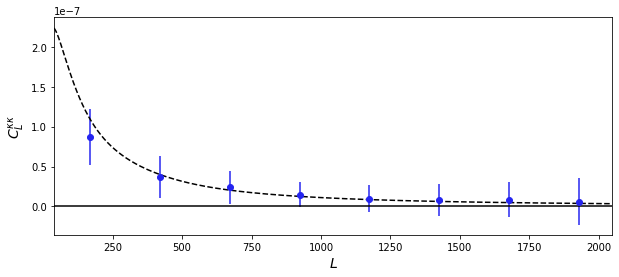

In [8]:
snr(qobj['iso15V3PT'],bnum=8)

10.638068603756555
obs A 1.0 mean(A) 1.001 sigma(A) 0.121 S/N 8.261 A>oA 1.0


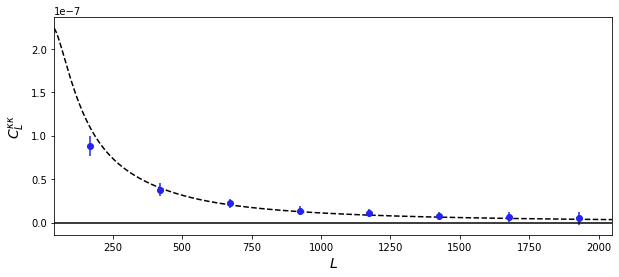

In [7]:
snr(qobj['com15v0PT'],bnum=8)

chi: -3.6 , chi (sim mean): 0.0 , chi (sim std): 6.0 , PTE: 0.46 
chi^2: 10.3 , chi^2 (sim): 11.1 , PTE: 0.52 
chi: -3.6 , chi (sim mean): 0.0 , chi (sim std): 6.0 , PTE: 0.46 
chi^2: 9.0 , chi^2 (sim): 11.1 , PTE: 0.61 


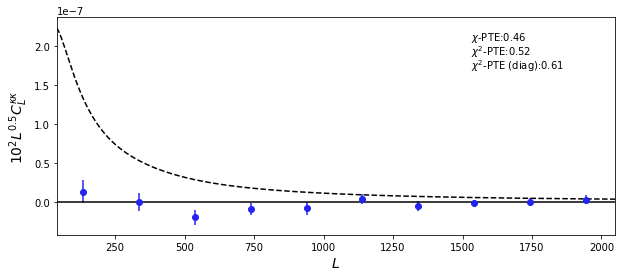

In [10]:
plot_spec(qobj['com15v0PT'],bnum=10,lmin=40)